<a href="https://colab.research.google.com/github/zeph0yr/Data-Mining-and-Prediction-Modelling/blob/master/LSTM(Finalized).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [0]:
df_final = pd.read_csv("app.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
#feature scaling
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range = (0, 1))
#df= sc.fit_transform(df_final)

In [0]:
df_final.head()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,1.258929,1.339286,1.250000,1.330357,1.081430,45799600
1990-01-03,1.357143,1.357143,1.339286,1.339286,1.088688,51998800
1990-01-04,1.366071,1.383929,1.330357,1.343750,1.092317,55378400
1990-01-05,1.348214,1.366071,1.321429,1.348214,1.095946,30828000
1990-01-08,1.339286,1.357143,1.321429,1.357143,1.103203,25393200


In [0]:
df_final.shape


(7579, 6)

In [0]:
df_final.describe()


,Open,High,Low,Close,Adj Close,Volume
count,7579.000000,7579.000000,7579.000000,7579.000000,7579.000000,7.579000e+03
mean,40.778490,41.166883,40.381736,40.789104,38.260195,9.975143e+07
std,61.037141,61.569601,60.539795,61.088480,59.389444,9.200897e+07
min,0.459821,0.473214,0.455357,0.462054,0.402033,5.992000e+05
25%,1.428571,1.459821,1.401786,1.428571,1.219695,4.017045e+07
50%,4.937143,5.065714,4.839286,4.967143,4.321916,7.026320e+07
75%,65.364998,65.761429,64.740715,65.225712,57.521214,1.262762e+08
max,324.450012,327.850006,321.380005,324.339996,324.339996,1.855410e+09


In [0]:
df_final.isnull().values.any()


False

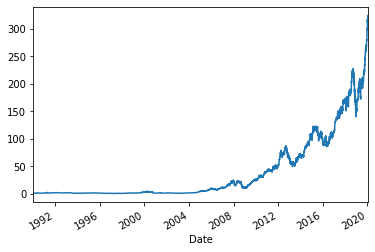

In [0]:
df_final['Adj Close'].plot()


In [0]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

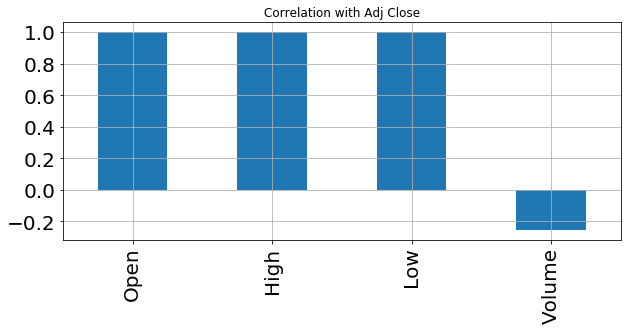

In [0]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (10, 4), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [0]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,1.258929,1.339286,1.250000,1.330357,1.081430,45799600
1990-01-03,1.357143,1.357143,1.339286,1.339286,1.088688,51998800
1990-01-04,1.366071,1.383929,1.330357,1.343750,1.092317,55378400
1990-01-05,1.348214,1.366071,1.321429,1.348214,1.095946,30828000
1990-01-08,1.339286,1.357143,1.321429,1.357143,1.103203,25393200


In [0]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.002466,0.002645,0.002476,0.024369
1990-01-03,0.002770,0.002700,0.002754,0.027712
1990-01-04,0.002797,0.002782,0.002726,0.029534
1990-01-05,0.002742,0.002727,0.002699,0.016298
1990-01-08,0.002714,0.002700,0.002699,0.013367


In [0]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.002466,0.002645,0.002476,0.024369
1990-01-03,0.002770,0.002700,0.002754,0.027712
1990-01-04,0.002797,0.002782,0.002726,0.029534
1990-01-05,0.002742,0.002727,0.002699,0.016298
1990-01-08,0.002714,0.002700,0.002699,0.013367


Shape of features :  (7579, 4)
Shape of target :  (7579, 1)


,Open,High,Low,Volume
Date,,,,
2020-01-23,0.979845,0.974677,0.982145,0.013758
2020-01-24,0.987037,0.986193,0.987972,0.019428
2020-01-27,0.955585,0.950882,0.948586,0.021504
2020-01-28,0.963425,0.971134,0.971364,0.021544
2020-01-29,1.000000,1.000000,1.000000,0.028821


,Adj Close
Date,
2020-01-23,318.309998
2020-01-24,308.950012
2020-01-27,317.690002
2020-01-28,324.339996
2020-01-29,323.869995



 -----After process------ 

Shape of features :  (7489, 4)
Shape of target :  (7489, 1)


,Adj Close
Date,
2019-09-16,220.039383
2019-09-17,222.103195
2019-09-18,220.298615
2019-09-19,217.078262
2019-09-20,218.065308


In [0]:
s_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [0]:
X_train.shape


(6809, 4)

In [0]:
X_test.shape


(680, 4)

In [0]:
y_train.shape



(6809,)

In [0]:
y_test.shape


(680,)

In [0]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  151.6219904371805
R2 score:  -23.427275928632863


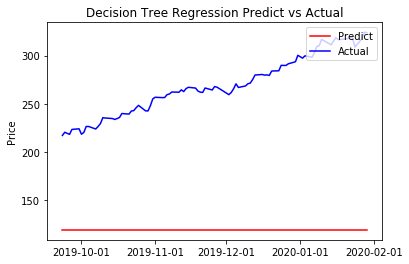

In [0]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

In [0]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [136]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
6809/6809 [==============================] - 3s 413us/step - loss: 1142.3265
Epoch 2/200
6809/6809 [==============================] - 2s 319us/step - loss: 919.0649
Epoch 3/200
6809/6809 [==============================] - 2s 301us/step - loss: 749.5358
Epoch 4/200
6809/6809 [==============================] - 2s 303us/step - loss: 592.1697
Epoch 5/200
6809/6809 [==============================] - 2s 309us/step - loss: 435.7778
Epoch 6/200
6809/6809 [==============================] - 2s 316us/step - loss: 289.6887
Epoch 7/200
6809/6809 [==============================] - 2s 290us/step - loss: 177.1607
Epoch 8/200
6809/6809 [==============================] - 2s 303us/step - loss: 102.0443
Epoch 9/200
6809/6809 [==============================] - 2s 301us/step - loss: 56.5016
Epoch 10/200
6809/6809 [==============================] - 2s 292us/step - loss: 30.6693
Epoch 11/200
6809/6809 [==============================] - 2s 307us/step - loss: 16.7877
Epoch 12/200
6809/6809 [========

In [0]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.998
The R2 score on the Test set is:	0.421


In [0]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)


680/680 [==============================] - 0s 663us/step


In [0]:
print('LSTM: %f'%score_lstm)


LSTM: 415.132864


In [0]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)


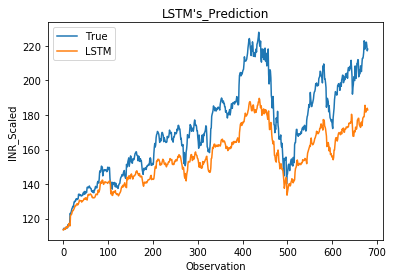

In [0]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()
